In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='ticks', font_scale=1.5)
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 6

Решить ДУ:

$$ y' + 2y = t^2 $$
$$y(0) = 1 $$
на отрезке $[0, 1]$ с шагом $h=0.1$

In [2]:
def y_precise(t):
    """
    Точное решение ДУ
    """
    return ((3/4) * np.exp(-2*t)) + ((1/2) * (t**2)) - ((1/2) * t) + (1/4)

$$ y' = f_1(t, y) = t^2 - 2y$$

In [3]:
def f(t, y: list):
    """
    Правая часть ДУ
    """
    f1 = t**2 - 2*y
    f = np.array([f1])
    
    return f

**Метод Рунге-Кутты**

In [4]:
t_n = 1  # граница времени
h = 0.1  # шаг сетки
N = int(t_n / h) + 2

t = np.linspace(0, t_n, N+1)
y = np.zeros((N+1, 1))

# начальные условия
y[0][0] = 1

for i in range(N):
    k1 = f(t[i], y[i])
    k2 = f(t[i]+h/2, y[i]+(h/2)*k1)
    k3 = f(t[i]+h/2, y[i]+(h/2)*k2)
    k4 = f(t[i]+h, y[i]+h*k3)
    
    y[i+1] = y[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

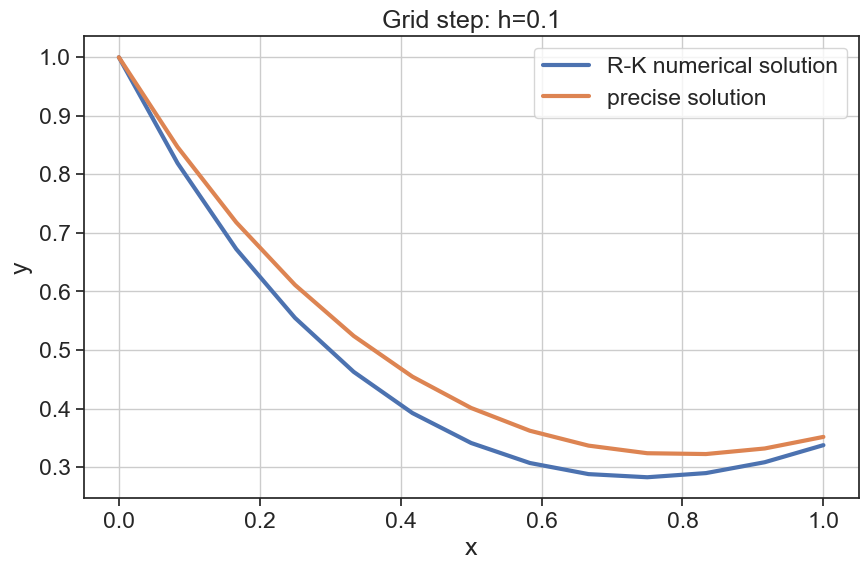

In [5]:
plt.plot(t, y[:, 0], lw=3, label='R-K numerical solution')
plt.plot(t, y_precise(t), lw=3, label='precise solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Grid step: h={h}')
plt.legend()
plt.grid()